In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
data = pd.read_csv("./data/Galton.csv")
data.head()

,Unnamed: 0,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,001,78.5,67.0,75.43,4,1,male,73.2
1,2,001,78.5,67.0,75.43,4,2,female,69.2
2,3,001,78.5,67.0,75.43,4,3,female,69.0
3,4,001,78.5,67.0,75.43,4,4,female,69.0
4,5,002,75.5,66.5,73.66,4,1,male,73.5


In [3]:
from sklearn.preprocessing import LabelEncoder
data.gender = LabelEncoder().fit_transform(data.gender)

In [4]:
# data = data.drop(['Unnamed: 0', 'children', 'childNum', 'midparentHeight'], axis=1)
data = data.drop(['Unnamed: 0', 'children', 'childNum', 'father', 'mother'], axis=1)
df = pd.get_dummies(data, columns=['family'])
df.head()

,midparentHeight,gender,childHeight,family_001,family_002,family_003,family_004,family_005,family_006,family_007,...,family_195,family_196,family_197,family_198,family_199,family_200,family_201,family_202,family_203,family_204
0,75.43,1,73.2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,75.43,0,69.2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,75.43,0,69.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,75.43,0,69.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,73.66,1,73.5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
features = list(df.columns.values)
features.remove('childHeight')
target = 'childHeight'

In [6]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [7]:
X, y = df[features].values, df[target].values

Try Ridge

In [8]:
alphas = np.logspace(-5, 3, 50, base=np.e)
# alphas = [0.01, 0.1, 1]
tuned_parameters = [{'alpha':alphas}]
n_folds = 10

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200)
clf = GridSearchCV(Ridge(), 
               tuned_parameters, 
               scoring='neg_mean_squared_error', 
               cv=n_folds, 
               refit=False)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid=[{'alpha': array([6.73794700e-03, 7.93291520e-03, 9.33980983e-03, 1.09962158e-02,
       1.29463838e-02, 1.52424121e-02, 1.79456387e-02, 2.11282799e-02,
       2.48753593e-02, 2.92869796e-02, 3.44809963e-02, 4.05961667e-02,
       4.77958565e-02, 5.62724042e-02, 6.62522592e-02, 7.80020315e-02,
       9.18356142e-02, 1.08122569e-01, 1.27297999e-01,...
       6.51439058e-01, 7.66971127e-01, 9.02992694e-01, 1.06313755e+00,
       1.25168394e+00, 1.47366884e+00, 1.73502255e+00, 2.04272707e+00,
       2.40500269e+00, 2.83152752e+00, 3.33369611e+00, 3.92492381e+00,
       4.62100514e+00, 5.44053581e+00, 6.40540943e+00, 7.54140243e+00,
       8.87886265e+00, 1.04535201e+01, 1.23074415e+01, 1.44901541e+01,
       1.70599685e+01, 2.00855369e+01])}],
             refit=False, scoring='neg_mean_squared_error')

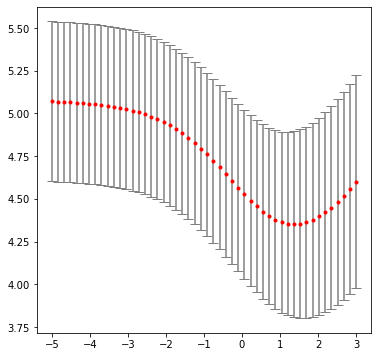

In [10]:
scores = -clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

fig = plt.figure(figsize=(6,6))
plt.errorbar(np.log(alphas), scores, 0.5*scores_std, fmt='.r', ecolor='gray', capsize=5)
plt.show()  

In [11]:
clf.best_params_['alpha'], clf.best_score_

(3.9249238068385153, -4.351304921899686)

In [12]:
MSE = np.zeros(100)
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200)
    
    ridge = Ridge().set_params(alpha=clf.best_params_['alpha'])
    ridge.fit(X_train, y_train)
    
    MSE[i] = mse(ridge.predict(X_test), y_test)

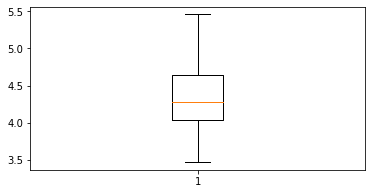

4.338183707051802
[4.60518538 3.89449425 4.46134003 4.84186373 4.16609875 4.47434427]


In [13]:
fig = plt.figure(figsize=(6,3))
ax = fig.gca()
ax.boxplot(MSE)
plt.show()
print(MSE.mean())
print(MSE[0:6])

Try Lasso

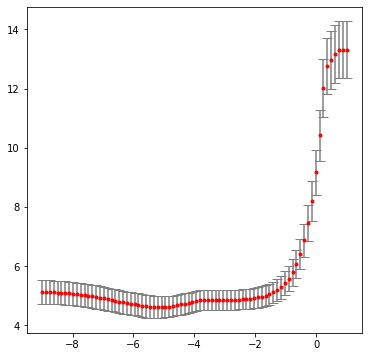

In [14]:
alphas = np.logspace(-9, 1, 80, base=np.e)
tuned_parameters = [{'alpha':alphas}]
n_folds = 10

clf = GridSearchCV(Lasso(max_iter=5000), 
               tuned_parameters, 
               scoring='neg_mean_squared_error', 
               cv=n_folds, 
               refit=False)
clf.fit(X_train, y_train)
scores = -clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

fig = plt.figure(figsize=(6,6))
plt.errorbar(np.log(alphas), scores, 0.5*scores_std, fmt='.r', ecolor='gray', capsize=5)
plt.show()  

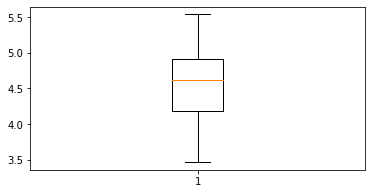

4.58237759641934
[4.15258392 4.84395772 4.92001934 4.53107534 5.38318447 4.59982865]


In [15]:
MSE = np.zeros(100)
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200)
    
    lasso = Lasso().set_params(alpha=clf.best_params_['alpha'])
    lasso.fit(X_train, y_train)
    
    MSE[i] = mse(lasso.predict(X_test), y_test)
fig = plt.figure(figsize=(6,3))
ax = fig.gca()
ax.boxplot(MSE)
plt.show()
print(MSE.mean())
print(MSE[0:6])

In [16]:
clf.best_params_, clf.best_score_

({'alpha': 0.0070878935182844905}, -4.617359043724911)

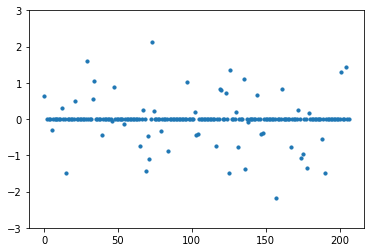

In [17]:
plt.scatter(range(len(features)),lasso.coef_,s=10)
plt.ylim(-3,3)
plt.show()

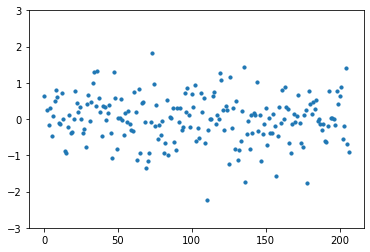

In [18]:
plt.scatter(range(len(features)),ridge.coef_,s=10)
plt.ylim(-3,3)
plt.show()

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   family           934 non-null    object 
 1   midparentHeight  934 non-null    float64
 2   gender           934 non-null    int64  
 3   childHeight      934 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 29.3+ KB


In [37]:
md = smf.mixedlm("childHeight ~ midparentHeight + gender", data, groups=data["family"])

In [40]:
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: childHeight
No. Observations:  934     Method:             REML       
No. Groups:        205     Scale:              3.8202     
Min. group size:   1       Log-Likelihood:     -2025.6319 
Max. group size:   15      Converged:          Yes        
Mean group size:   4.6                                    
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       18.130    3.685  4.919 0.000 10.906 25.353
midparentHeight  0.664    0.053 12.493 0.000  0.560  0.768
gender           5.222    0.135 38.596 0.000  4.957  5.488
Group Var        0.928    0.107                           

